# 2015 Tree Census - NYC

The 2015 Tree Census dataset for New York City is collected by volunteers and staff members from NYC Parks & Rec.

Source: https://catalog.data.gov/dataset/2015-street-tree-census-tree-data
<br>
Source: https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh

# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('2015-tree-census.csv') # import data
tree = data # save a copy of data as tree

In [3]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
tree_id             683788 non-null int64
block_id            683788 non-null int64
created_at          683788 non-null object
tree_dbh            683788 non-null int64
stump_diam          683788 non-null int64
curb_loc            683788 non-null object
status              683788 non-null object
health              652172 non-null object
spc_latin           652169 non-null object
spc_common          652169 non-null object
steward             652173 non-null object
guards              652172 non-null object
sidewalk            652172 non-null object
user_type           683788 non-null object
problems            652124 non-null object
root_stone          683788 non-null object
root_grate          683788 non-null object
root_other          683788 non-null object
trunk_wire          683788 non-null object
trnk_light          683788 non-null object
trnk_other          683788 non-nu

In [4]:
tree.shape

(683788, 45)

In [5]:
tree.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [6]:
tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [7]:
# drop duplicates

tree = tree.drop_duplicates()

tree.shape # there does not appear to be any duplicates

(683788, 45)

In [8]:
# display null values

tree.isnull().sum() # looks like quite a bit of null values

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

In [9]:
# drop columns that are not needed for analysis

drop_list = ['block_id', 'created_at', 'state', 'spc_latin','borocode', 'postcode', 'zip_city', 'user_type','community board', 'cncldist', 'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl']

# we are dropping 'spc_latin' since we are using 'spc_common' to account for the types of trees grown in NYC

In [10]:
tree.drop(drop_list, axis='columns', inplace=True)

In [11]:
tree.isnull().sum() # new remaining columns

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
address           0
borough           0
dtype: int64

In [12]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683788 entries, 0 to 683787
Data columns (total 22 columns):
tree_id       683788 non-null int64
tree_dbh      683788 non-null int64
stump_diam    683788 non-null int64
curb_loc      683788 non-null object
status        683788 non-null object
health        652172 non-null object
spc_common    652169 non-null object
steward       652173 non-null object
guards        652172 non-null object
sidewalk      652172 non-null object
problems      652124 non-null object
root_stone    683788 non-null object
root_grate    683788 non-null object
root_other    683788 non-null object
trunk_wire    683788 non-null object
trnk_light    683788 non-null object
trnk_other    683788 non-null object
brch_light    683788 non-null object
brch_shoe     683788 non-null object
brch_other    683788 non-null object
address       683788 non-null object
borough       683788 non-null object
dtypes: int64(3), object(19)
memory usage: 120.0+ MB


Since there are several rows with missing data, we must look into possible reasons why they are absent. Perhaps it is because the tree is listed as 'Stump' or 'Dead' under 'status', which is why the remaining fields lack data.

In [13]:
tree.status.value_counts(dropna=False) # show any missing data

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [14]:
tree.health.value_counts(dropna=False) # show any missing data

# looks like the number of 'NaN' under 'health' is roughly the same as 'Stump / Dead' under 'status'

Good    528850
Fair     96504
NaN      31616
Poor     26818
Name: health, dtype: int64

Since 31616 rows lack 'health' data and 31615 rows are classified as 'Stump' or 'Dead' in terms of 'status', there may be a row that does not contain 'health' data and is marked as 'Alive.'

In [15]:
# filter for row with missing health data and 'Alive' as 'status'

miss_health = tree[(tree.health.isnull()) & (tree.status == 'Alive')]
miss_health

# located the row!
# this row can be removed since the health is unknown, despite the tree being alive

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,guards,sidewalk,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough
32864,245041,16,0,OnCurb,Alive,NaN,green ash,None,None,Damage,...,No,No,No,No,No,No,No,No,84 LUCILLE AVENUE,Staten Island


In [16]:
# removing the row

tree = tree.drop(tree.index[32864])

The City of New York mentions that dead trees and stumps do not have data recorded for the following fields:
- steward (31615)
- guards (31616)
- sidewalk (31616)

Let's investigate and locate any rows that lack data or may be incorrectly labeled.

In [17]:
# locate rows with missing 'guards' and 'sidewalk' data

guards_sidewalk = tree[(tree.guards.isnull())  & (tree.sidewalk.isnull())]
guards_sidewalk.shape

# this is consistent with the count for 'steward'

(31615, 22)

In [18]:
# check when guards is null and sidewalk is not

guards_null = tree[(tree.guards.isnull()) & (~tree.sidewalk.isnull())]
guards_null

# tree is alive and in poor health and is not indentified (species)
# delete this row

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,guards,sidewalk,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough
427537,630814,11,0,OnCurb,Alive,Poor,NaN,None,NaN,Damage,...,No,No,No,No,No,No,No,No,38-028 CEDAR LANE,Queens


In [19]:
# dropping the row

tree = tree.drop(index=427537)

In [20]:
# check when guards is not null and sidewalk is

sidewalk_null = tree[(~tree.guards.isnull()) & (tree.sidewalk.isnull())]
sidewalk_null

# tree is alive, in good health, and is identified
# delete this row

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,guards,sidewalk,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough
346236,540677,7,0,OffsetFromCurb,Alive,Good,honeylocust,None,None,NaN,...,No,No,No,No,No,No,No,No,1220 LIBERTY AVENUE,Brooklyn


In [21]:
# dropping the row

tree = tree.drop(index=346236)

It looks like there is a row without 'guard' data and another row without 'sidewalk' data. Put together, they consistently show 31615 rows that lack data, same as steward.

In [22]:
# look for row with sidewalk, without steward

steward_sidewalk_null = tree[(~tree.steward.isnull()) & (tree.sidewalk.isnull())] # none

# look for row with guards, without steward

guards_guards_null = tree[(~tree.steward.isnull()) & (tree.guards.isnull())] # none

# look for row with steward

steward_null_sidewalk = tree[(tree.steward.isnull()) & (~tree.sidewalk.isnull())] # none
steward_null_guards = tree[(tree.steward.isnull()) & (~tree.guards.isnull())] # none

In [23]:
tree.isnull().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31615
spc_common    31618
steward       31615
guards        31615
sidewalk      31615
problems      31663
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
address           0
borough           0
dtype: int64

In [24]:
tree.shape

(683785, 22)

In [25]:
# remove all rows where the 'status' of the tree is 'Stump'
# dropping rows that contain a specific value

tree = tree[tree.status != 'Stump']

# drop rows where 'status' is 'Dead'

tree = tree[tree.status != 'Dead']

# new tree dataframe includes all rows where 'status' is NOT 'Stump' or 'Dead'

tree.shape

(652170, 22)

In [26]:
# removing the column 'stump_diam' since all trees that are 'Alive' have a diameter of 0

tree.drop('stump_diam', axis='columns', inplace=True)

In [27]:
# check for null values again

tree.isnull().sum()

tree_id        0
tree_dbh       0
curb_loc       0
status         0
health         0
spc_common     4
steward        0
guards         0
sidewalk       0
problems      48
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
address        0
borough        0
dtype: int64

In [28]:
# remove the 'status' column too since all trees are 'Alive'

tree.drop('status', axis='columns', inplace=True)

After removing the rows where the tree is 'Dead' or 'Stump', most columns no longer contain missing data. For the 'problems' column, the empty ones will be removed since there is no way to discern whether or not the tree had any problems due to lack of knowledge. The same will be done for the 'spc_latin' and 'spc_common' columns. Since the sample size is large, removing these columns is okay.

In [29]:
# locate rows with empty 'spc_common' column

null_spc = tree[tree.spc_common.isnull()] # 4 rows × 21 columns

In [30]:
# locate rows where problems is NaN

problems_null = tree[tree.problems.isnull()]

In [31]:
# drop rows where data is missing

tree = tree.dropna()

# final check for missing values 

tree.isnull().sum()

tree_id       0
tree_dbh      0
curb_loc      0
health        0
spc_common    0
steward       0
guards        0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
address       0
borough       0
dtype: int64

In [32]:
# take a sample of the cleaned data

tree.head(10)

,tree_id,tree_dbh,curb_loc,health,spc_common,steward,guards,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,borough
0,180683,3,OnCurb,Fair,red maple,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,Queens
1,200540,21,OnCurb,Fair,pin oak,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,Queens
2,204026,3,OnCurb,Good,honeylocust,1or2,None,Damage,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,Brooklyn
3,204337,10,OnCurb,Good,honeylocust,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,Brooklyn
4,189565,21,OnCurb,Good,American linden,None,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,Brooklyn
5,190422,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,None,No,No,No,No,No,No,No,No,No,8 COLUMBUS AVENUE,Manhattan
6,190426,11,OnCurb,Good,honeylocust,1or2,Helpful,NoDamage,None,No,No,No,No,No,No,No,No,No,120 WEST 60 STREET,Manhattan
7,208649,9,OnCurb,Good,American linden,None,None,NoDamage,MetalGrates,No,Yes,No,No,No,No,No,No,No,311 WEST 50 STREET,Manhattan
8,209610,6,OnCurb,Good,honeylocust,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,65 JEROME AVENUE,Staten Island
9,192755,21,OffsetFromCurb,Fair,London planetree,None,None,NoDamage,None,No,No,No,No,No,No,No,No,No,638 AVENUE Z,Brooklyn


To recap, we've narrowed down our data to use specific columns that help us in our analysis and removed any rows that contain missing data. The next step is to discover and analyze any relationships that exist between columns by plotting our data to tell a story.

# Data Storytelling

- Can you count something interesting?
- Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can you make a bar plot or a histogram?
- Can you compare two related quantities?
- Can you make a scatterplot?
- Can you make a time-series plot?
- Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
- Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

## Distribution of Tree Diameters

Let's look at the distribution of the diameters of trees grown in NYC. The column we are looking at is 'tree_dbh,' which is described by the NYC Parks & Rec as "diameter of the tree, measured at approximately 54" / 137cm above the ground."

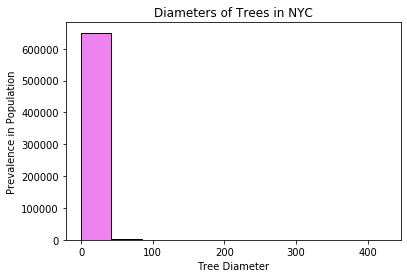

In [33]:
# plotting the distribution of tree diameters

tree['tree_dbh'].plot(kind='hist', title='Diameters of Trees in NYC', color='violet', edgecolor='black')
_ = plt.xlabel('Tree Diameter')
_ = plt.ylabel('Prevalence in Population')

Observe that the diameters greatly skew to the right. It also appears that some exceed 400, which is extreme for trees grown in the city. Let's look into these outliers and remove them from the dataset.

In [34]:
tree['tree_dbh'].describe()

count    652118.000000
mean         11.709684
std           8.634257
min           0.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

Here, we see that the max value is 425 and the min value is 0, both of which are not realistic for diameters of a tree. Referencing the average diameter of a tree, http://biorefinery.utk.edu/technical_reviews/Tree%20Size.pdf, we set the max at 100 and remove any trees whose diameter falls out of this range.

In [35]:
# all trees must have a diameter: 0 < n <= 100, where n = tree

# locate how many trees have a diameter of 0

tree_null_diam = tree[tree.tree_dbh == 0] # shape: (222, 25)

# remove trees with 0 as diameter

tree = tree[tree.tree_dbh != 0]

# remove trees with a diameter over 100

tree = tree[tree.tree_dbh < 101]

In [36]:
# another look at 'tree_dbh'

tree.tree_dbh.describe()

count    651829.000000
mean         11.696164
std           8.428281
min           1.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         100.000000
Name: tree_dbh, dtype: float64

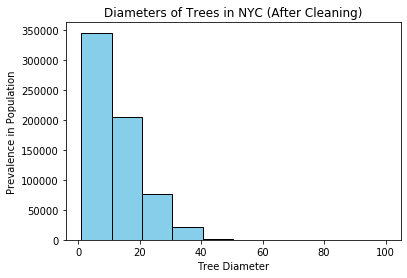

In [37]:
# plot the new distribution

tree['tree_dbh'].plot(kind='hist', title='Diameters of Trees in NYC (After Cleaning)', color='skyblue', edgecolor='black')
_ = plt.xlabel('Tree Diameter')
_ = plt.ylabel('Prevalence in Population')

After removing the extreme values from the dataset, the data is still skewed to the right. It appears that the majority of trees are less than 60 in diameter.
<br />
For kicks, let's make one last histogram where the maximum diameter is 50.

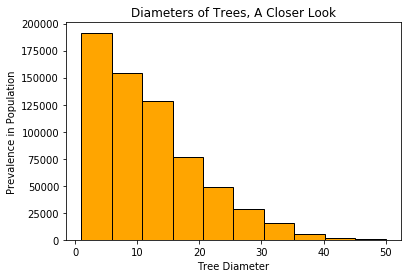

In [38]:
tree[tree.tree_dbh < 51].tree_dbh.plot(kind='hist', color='orange', edgecolor='black', title='Diameters of Trees, A Closer Look')
_ = plt.xlabel('Tree Diameter')
_ = plt.ylabel('Prevalence in Population')

## Which Boroughs Have the Healthiest / Unhealthiest Trees?

Let's look at which boroughs of NYC have the highest proportion of 'good' trees, 'fair' trees, and 'poor' trees.

In [39]:
# how many trees are in each borough

tree.borough.value_counts()

Queens           237850
Brooklyn         169672
Staten Island    101353
Bronx             80548
Manhattan         62406
Name: borough, dtype: int64

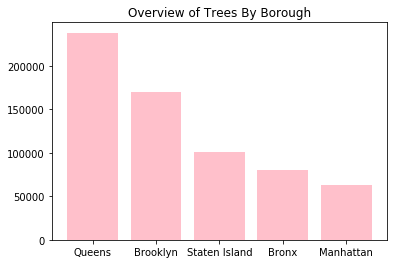

In [40]:
# plotting trees by borough

boroughs = ['Queens', 'Brooklyn', 'Staten Island', 'Bronx', 'Manhattan']
bor_num_trees = tree.borough.value_counts()

plt.bar(boroughs, bor_num_trees, color='pink')
plt.title('Overview of Trees By Borough')
plt.show()

The majority of trees are in Queens.

In [41]:
# separate trees by borough

queens = tree[tree.borough == 'Queens']['health'].value_counts()
brooklyn = tree[tree.borough == 'Brooklyn']['health'].value_counts()
staten_island = tree[tree.borough == 'Staten Island']['health'].value_counts()
bronx = tree[tree.borough == 'Bronx']['health'].value_counts()
manhattan = tree[tree.borough == 'Manhattan']['health'].value_counts()

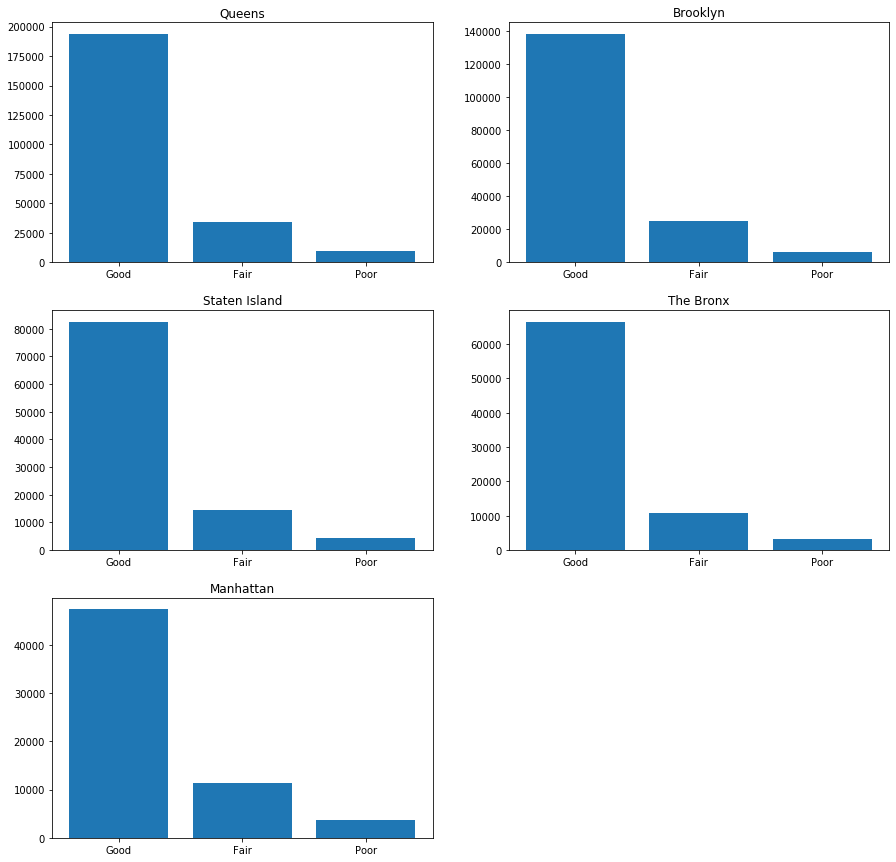

In [42]:
# plotting the categorical data

health_quality = ['Good', 'Fair', 'Poor']

plt.figure(figsize=(15,15))

plt.subplot(321)
plt.title('Queens')
plt.bar(health_quality, queens)
plt.subplot(322)
plt.title('Brooklyn')
plt.bar(health_quality, brooklyn)
plt.subplot(323)
plt.title('Staten Island')
plt.bar(health_quality, staten_island)
plt.subplot(324)
plt.title('The Bronx')
plt.bar(health_quality, bronx)
plt.subplot(325)
plt.title('Manhattan')
plt.bar(health_quality, manhattan)

plt.show()

After isolating trees to each borough, we see that the distributions of 'good', 'fair', and 'poor' trees are fairly similar. The Bronx has the highest proportion of 'Good' trees and Manhattan has the highest proportion of 'Fair' trees and 'Poor' trees.

## Are Trees With Stewards Healthier Than Those Without?

Let's take a look at trees and their steward, which indicates the number of unique signs of stewardship observed for a tree, and see if we can determine if trees with a steward (or more) are healthier than trees without.
<br />
The Parks & Rec website define 'steward' as "Indicates the number of unique signs of stewardship observed for this tree. Not recorded for stumps or dead trees."

In [43]:
# look at stewardship

tree.steward.value_counts()

None       487624
1or2       143424
3or4        19172
4orMore      1609
Name: steward, dtype: int64

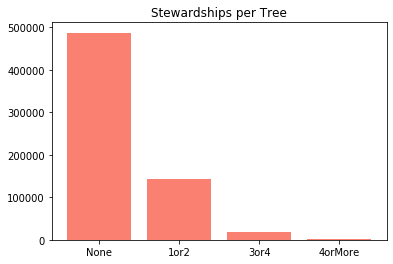

In [44]:
# visualizing stewardship

ste_count = ['None', '1or2', '3or4', '4orMore']
ste_trees = tree.steward.value_counts()

plt.bar(ste_count, ste_trees, color='salmon')
plt.title('Stewardships per Tree')

plt.show()

In [45]:
# separate trees by number of stewardships

steward_none = tree[tree.steward == 'None']['health'].value_counts()
steward_one_two = tree[tree.steward == '1or2']['health'].value_counts()
steward_three_four = tree[tree.steward == '3or4']['health'].value_counts()
steward_four_more = tree[tree.steward == '4orMore']['health'].value_counts()

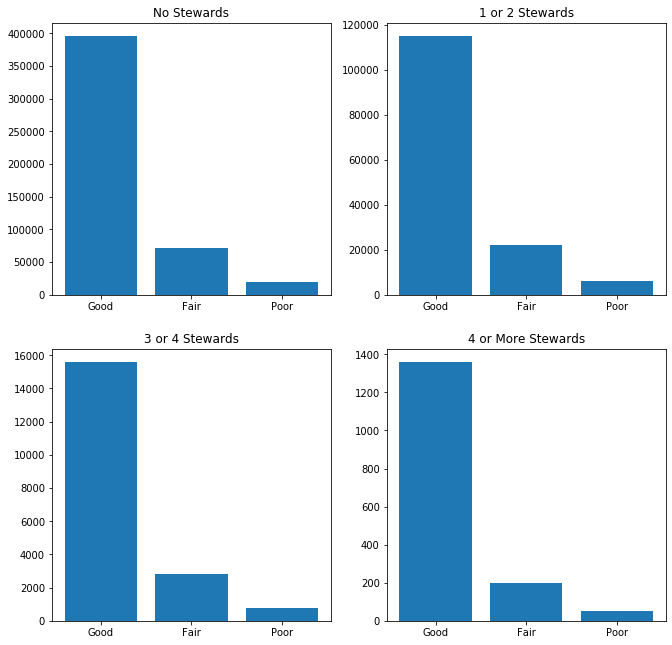

In [46]:
# plot the representation

health_quality = ['Good', 'Fair', 'Poor']

plt.figure(figsize=(11,11))

plt.subplot(221)
plt.title('No Stewards')
plt.bar(health_quality, steward_none)
plt.subplot(222)
plt.title('1 or 2 Stewards')
plt.bar(health_quality, steward_one_two)
plt.subplot(223)
plt.title('3 or 4 Stewards')
plt.bar(health_quality, steward_three_four)
plt.subplot(224)
plt.title('4 or More Stewards')
plt.bar(health_quality, steward_four_more)

plt.show()

The more stewardships a tree has, the less likely it is to be in poor health. In fact, trees with at least 3 stewardships are mostly in 'Good' health.

## Tree Health and Guards

Next, we'll observe if the health of the tree changes based on the number of guards present and if the guard present was helpful or not.
<br />
The Parks & Rec site describes 'guards' as "indicates whether a guard is present, and if the user felt it was a helpful or harmful guard. Not recorded for dead trees and stumps."

In [47]:
tree.guards.value_counts()

None       572012
Helpful     51830
Harmful     20242
Unsure       7745
Name: guards, dtype: int64

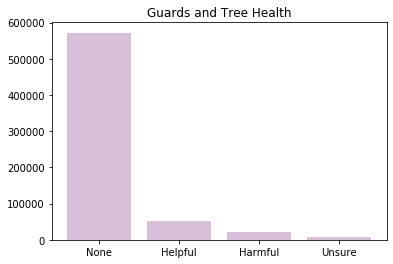

In [48]:
# plotting guards

guards = ['None', 'Helpful', 'Harmful', 'Unsure']
tree_guards = tree.guards.value_counts()

plt.bar(guards, tree_guards, color='thistle')
plt.title('Guards and Tree Health')
plt.show()

In [49]:
# separate the trees based on guardship

guard_none = tree[tree.guards == 'None']['health'].value_counts()
guard_helpful = tree[tree.guards == 'Helpful']['health'].value_counts()
guard_harmful = tree[tree.guards == 'Harmful']['health'].value_counts()
guard_unsure = tree[tree.guards == 'Unsure']['health'].value_counts()

## Tree Health and Sidewalks

Finally, we'll look at the impact of sidewalks on a tree's health. The Parks & Rec site "indicates whether one of the sidewalk flags immediately adjacent to the tree was damaged, cracked, or lifted. Not recorded for dead trees and stumps."

In [50]:
tree.sidewalk.value_counts()

NoDamage    464699
Damage      187130
Name: sidewalk, dtype: int64

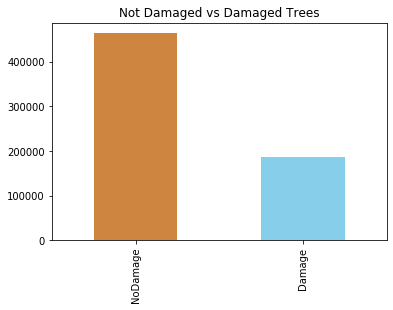

In [51]:
tree.sidewalk.value_counts().plot(kind='bar', color=['peru', 'skyblue'], title='Not Damaged vs Damaged Trees')
plt.show()

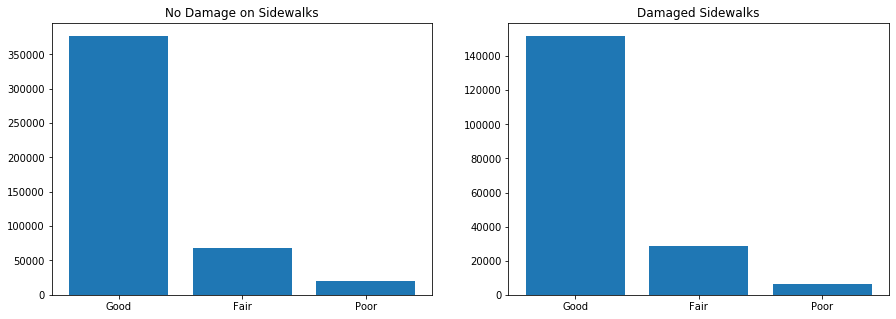

In [52]:
sidewalk_null = tree[tree.sidewalk == 'NoDamage']['health'].value_counts()
sidewalk_damage = tree[tree.sidewalk == 'Damage']['health'].value_counts()

health_quality = ['Good', 'Fair', 'Poor']

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('No Damage on Sidewalks')
plt.bar(health_quality, sidewalk_null)
plt.subplot(122)
plt.title('Damaged Sidewalks')
plt.bar(health_quality, sidewalk_damage)

plt.show()

## Trees on the Curb

We'll investigate if trees that are on the curb are healthier than trees off the curb. The Parks & Rec describes this as "location of tree bed in relationship to the curb; trees are either along the curb (OnCurb) or offset from the curb (OffsetFromCurb)."

In [53]:
tree.curb_loc.value_counts()

OnCurb            625973
OffsetFromCurb     25856
Name: curb_loc, dtype: int64

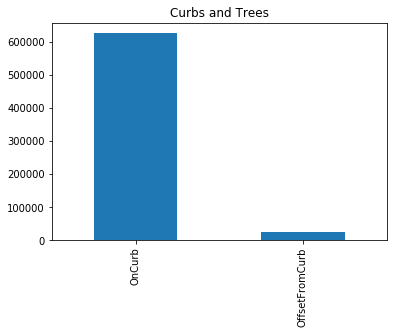

In [54]:
tree.curb_loc.value_counts().plot(kind='bar', title='Curbs and Trees')
plt.show()

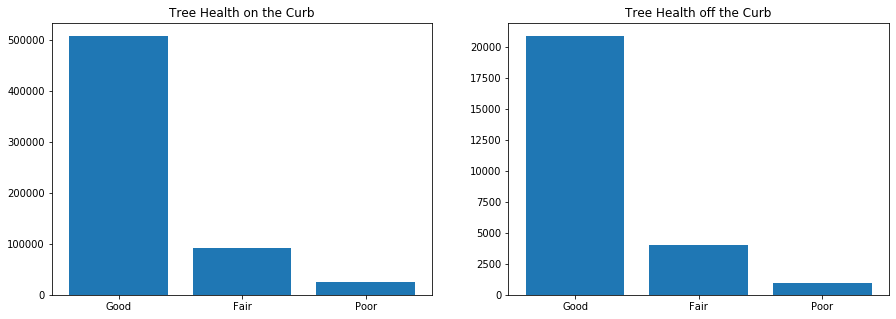

In [55]:
curb_on = tree[tree.curb_loc == 'OnCurb']['health'].value_counts()
curb_off = tree[tree.curb_loc == 'OffsetFromCurb']['health'].value_counts()

health_quality = ['Good', 'Fair', 'Poor']

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Tree Health on the Curb')
plt.bar(health_quality, curb_on)
plt.subplot(122)
plt.title('Tree Health off the Curb')
plt.bar(health_quality, curb_off)

plt.show()

# New Section

## Grouping Tree Species

In [56]:
# take a look at all the different trees grown in NYC

tree.spc_common.unique()

array(['red maple', 'pin oak', 'honeylocust', 'American linden',
       'London planetree', 'ginkgo', 'willow oak', 'sycamore maple',
       'Amur maple', 'hedge maple', 'American elm', 'ash', 'crab apple',
       'silver maple', 'Turkish hazelnut', 'black cherry',
       'eastern redcedar', 'Norway maple', 'tulip-poplar', 'sawtooth oak',
       'swamp white oak', 'Sophora', 'Chinese fringetree',
       'southern magnolia', 'sweetgum', 'Callery pear', 'scarlet oak',
       'Atlantic white cedar', 'black oak', 'Japanese zelkova',
       'white oak', 'Ohio buckeye', 'northern red oak', 'silver linden',
       'pignut hickory', 'Kentucky yellowwood', 'mulberry', 'Douglas-fir',
       'crepe myrtle', 'sassafras', 'cherry', 'spruce', 'Chinese elm',
       'horse chestnut', 'holly', 'littleleaf linden', 'white pine',
       'blackgum', 'Japanese tree lilac', 'hardy rubber tree',
       'green ash', 'English oak', 'white ash', 'golden raintree',
       "Schumard's oak", 'Siberian elm', 'black

There are numerous different types of trees grown in NYC. Let's take a look at the top 10.

In [57]:
tree.spc_common.value_counts().head(10)

London planetree     86997
honeylocust          64246
Callery pear         58898
pin oak              53167
Norway maple         34179
littleleaf linden    29733
Japanese zelkova     29251
cherry               29248
ginkgo               21012
Sophora              19332
Name: spc_common, dtype: int64

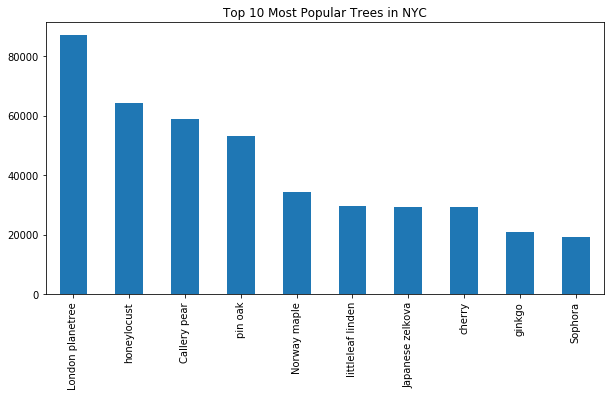

In [58]:
tree.spc_common.value_counts().head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Most Popular Trees in NYC')
plt.show()

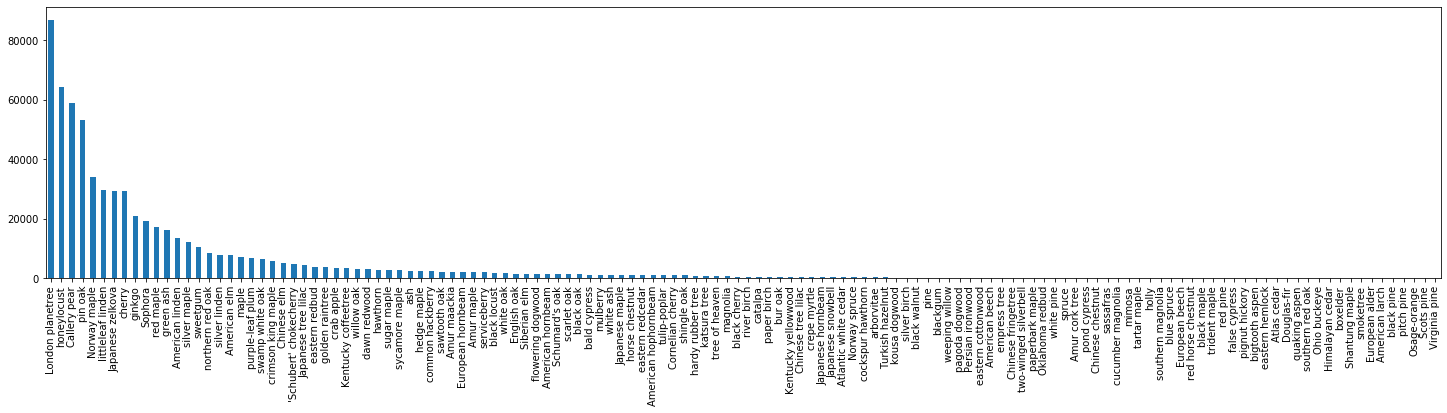

In [59]:
tree.spc_common.value_counts().plot(kind='bar', figsize=(25, 5))
plt.show()